# Datenvisualisierung mit Python

In den letzten Sessions haben wir die Grundlagen von **Pandas** kennengelernt. Dabei wurde deutlich, dass wir Daten oft erst dann vollständig verstehen, wenn wir sie sinnvoll visualisieren. **Visualisierungen** helfen uns, Muster, Trends oder Anomalien in den Daten schneller zu erkennen.

In diesem Kapitel werden wir uns darauf konzentrieren, wie wir Daten in Python visualisieren können, insbesondere mit der Bibliothek **Matplotlib**. Das Ziel ist es, die grundlegende Struktur und Vorgehensweise bei der Erstellung von Plots zu vermitteln. Das umfassende Thema der Datenvisualisierung wird hier nur oberflächlich angeschnitten, da es zu umfangreich für ein einzelnes Kapitel ist. Wir werden uns dabei auf einige der häufigsten Darstellungsformen konzentrieren, die (1) nur einen kleinen Teil der Möglichkeiten abdecken und (2) als Einstieg zu verstehen sind. In den kommenden Semestern werden wir diese Themen weiter vertiefen und neue Visualisierungsansätze kennenlernen.

### Verschiedene Bibliotheken zur Datenvisualisierung

In Python gibt es eine Vielzahl von Bibliotheken zur Datenvisualisierung. Einige der gängigsten sind:

- **Matplotlib**: Eine der grundlegendsten und flexibelsten Bibliotheken, auf der viele andere aufbauen.
- **Pandas**: Bietet integrierte Plotting-Funktionen, die aber komplett auf Matplotlib basieren.
- **Seaborn**: Baut auf Matplotlib auf, bietet aber schönere Standard-Plots und einige erweiterte statistische Visualisierungen.
- **Plotnine**: Basiert auf der "Grammar of Graphics" und folgt in seiner Logik damit eher der in "R" beliebten ggplot Bibliothek.
- **Bokeh**: Ermöglicht die Erstellung von interaktiven und dynamischen Visualisierungen für das Web.
- **Plotly**: Eine leistungsstarke Bibliothek für interaktive, webbasierte Visualisierungen, die oft für Dashboards verwendet wird.

### Dynamisch vs. statisch

Visualisierungen in Python lassen sich in zwei Hauptkategorien unterteilen:

- **Statische Visualisierungen**: Diese werden mit Bibliotheken wie **Matplotlib**, **Pandas** oder **Seaborn** erstellt. Sie eignen sich hervorragend für Präsentationen und Berichte, da sie keine interaktiven Elemente enthalten.
- **Dynamische Visualisierungen**: Bibliotheken wie **Bokeh** und **Plotly** ermöglichen die Erstellung interaktiver Plots, bei denen Benutzer beispielsweise zoomen, Details anzeigen oder die Darstellung in Echtzeit aktualisieren können. Diese eignen sich besonders für Dashboards und webbasierte Anwendungen.

### Warum Matplotlib?

Matplotlib ist nicht immer die erste Wahl, wenn es um einfache und schnelle Visualisierungen geht. Einige gängige Meinungen aus der Data-Science-Community:

- **Nicht so fancy, nicht so hübsch**: Es gibt Bibliotheken, die ästhetisch ansprechendere Standard-Plots bieten (z.B. Seaborn oder Plotly). Allerdings bedeutet das nicht, dass Matplotlib keine ansehnlichen Visualisierungen erzeugen kann.
- **Umständlich und "low-level"**: Im Vergleich zu Pandas oder Seaborn erfordert Matplotlib mehr Aufwand bei der Erstellung von Plots, da es sehr "niedrigschwellig" ist. Das bedeutet, dass man mehr manuelle Arbeit leisten muss, um die gewünschten Ergebnisse zu erzielen.

Trotzdem gibt es viele Gründe, warum wir uns hier auf Matplotlib konzentrieren:

- **Flexibilität**: Matplotlib kann nahezu jede Art von (statischer) Visualisierung erstellen. Es bietet vollständige Kontrolle über alle Aspekte eines Plots.
- **Grundlage für Pandas und Seaborn**: Viele andere Bibliotheken wie Pandas oder Seaborn bauen auf Matplotlib auf. Daher ist es sinnvoll, sich mit den Grundlagen von Matplotlib vertraut zu machen.
- **Große Nutzer- und Entwickler-Community**: Matplotlib hat eine sehr große und aktive Community, was bedeutet, dass viele Ressourcen, Tutorials und Hilfestellungen online verfügbar sind.

Aus diesen Gründen werden wir Matplotlib als Basis verwenden, bevor wir uns später in anderen Kursen dynamischeren Bibliotheken wie Bokeh oder Plotly widmen.

## Einführung

### Matplotlib
Matplotlib ist die am meisten genutzte Bibliothek in Python zum Erstellen von statischen Plots. Die Dokumentation findet ihr [hier](https://matplotlib.org/stable/index.html).

Wir werden hier überwiegend mit dem Teilmodul `pyplot` arbeiten. Damit lassen sich schnell einfache Plots erzeugen:

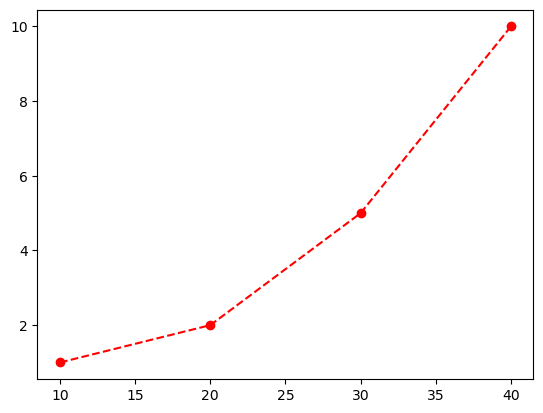

In [2]:
from matplotlib import pyplot as plt

plt.plot(
    [10, 20, 30, 40],
    [1, 2, 5, 10],
    "ro--"
)
plt.show()

### Input data
- Matplotlib kann numerische Daten u.a. aus List, Numpy, Array, oder Pandas DataFrames verarbeiten.
- Wenn bei `plt.plot()` nur ein Array übergeben wird, nimmt Matplotlib an, das x = [0, 1, 2...] sein muss.

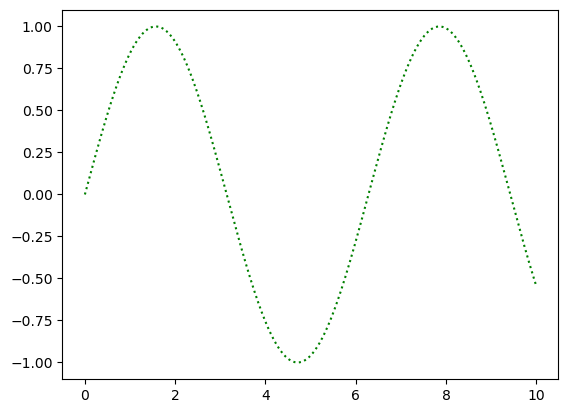

In [3]:
import numpy as np

x = np.arange(0, 10, 0.01)

plt.plot(x, np.sin(x), "g:")
# test yourself: plt.plot(np.sin(x), "g:")
plt.show()


## "Anatomy of a figure" - Wie ist eine Matplotlib Figure aufgebaut?

In den ersten Beispielen haben wir direkt mit `plt.plot()` gearbeitet. Das erfordert nur wenige Zeilen Code und gibt schnell erste Ergebnisse.

Es gibt bei Matplotlib aber zwei grundlegend unterschiedliche Ansätze um Grafiken zu erstellen!

1. `pyplot`-Interface (oder: functional interface)
2. Objekt-Orientiertes Interface

Der `pyplot`-Ansatz ist der Software MATLAB nachempfunden und lässt sich im Prinzip gut für einfache Plots nutzen. Sobald wir aber komplexere Grafiken erstellen wollen, kommen wir damit ziemlich schnell an Grenzen. Darum werden wir im folgenden v.a. mit dem Objekt-orientierten Ansatz arbeiten, auch wenn der auf den ersten Blick etwas komplizierter wirkt.

In Matplotlib sind die finalen Grafiken `Figure`-Objekte. Diese Objekte *enthalten* alle weiteren Objekte der Grafik (die sogennanten `Artists`). Dazu können viele verschiedene Dinge gehören wie im folgenden mit Matplotlib erstellten Plot zu sehen ist:

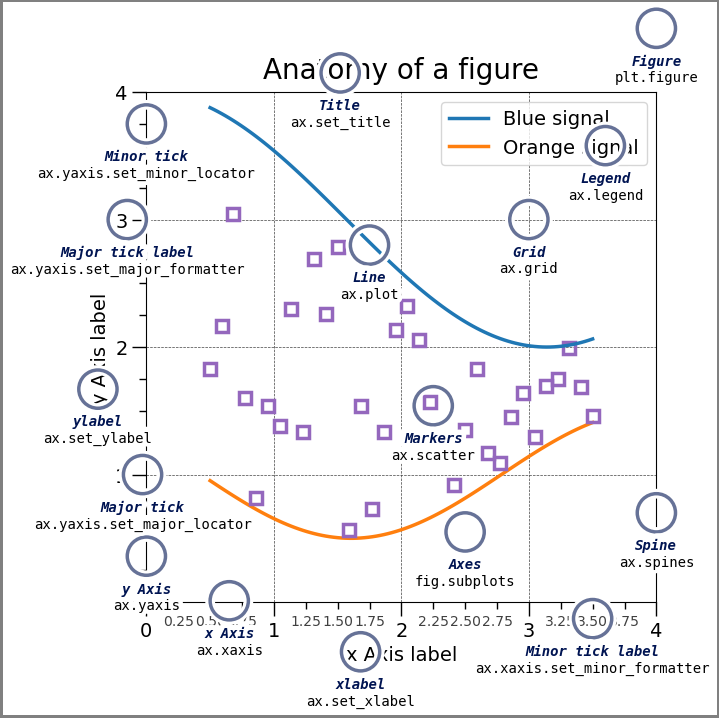

In [4]:
import matplotlib.pyplot as plt
import numpy as np

from matplotlib.patches import Circle
from matplotlib.patheffects import withStroke
from matplotlib.ticker import AutoMinorLocator, MultipleLocator

royal_blue = [0, 20/256, 82/256]


# make the figure

np.random.seed(19680801)

X = np.linspace(0.5, 3.5, 100)
Y1 = 3+np.cos(X)
Y2 = 1+np.cos(1+X/0.75)/2
Y3 = np.random.uniform(Y1, Y2, len(X))

fig = plt.figure(figsize=(7.5, 7.5))
ax = fig.add_axes([0.2, 0.17, 0.68, 0.7], aspect=1)

ax.xaxis.set_major_locator(MultipleLocator(1.000))
ax.xaxis.set_minor_locator(AutoMinorLocator(4))
ax.yaxis.set_major_locator(MultipleLocator(1.000))
ax.yaxis.set_minor_locator(AutoMinorLocator(4))
ax.xaxis.set_minor_formatter("{x:.2f}")

ax.set_xlim(0, 4)
ax.set_ylim(0, 4)

ax.tick_params(which='major', width=1.0, length=10, labelsize=14)
ax.tick_params(which='minor', width=1.0, length=5, labelsize=10,
               labelcolor='0.25')

ax.grid(linestyle="--", linewidth=0.5, color='.25', zorder=-10)

ax.plot(X, Y1, c='C0', lw=2.5, label="Blue signal", zorder=10)
ax.plot(X, Y2, c='C1', lw=2.5, label="Orange signal")
ax.plot(X[::3], Y3[::3], linewidth=0, markersize=9,
        marker='s', markerfacecolor='none', markeredgecolor='C4',
        markeredgewidth=2.5)

ax.set_title("Anatomy of a figure", fontsize=20, verticalalignment='bottom')
ax.set_xlabel("x Axis label", fontsize=14)
ax.set_ylabel("y Axis label", fontsize=14)
ax.legend(loc="upper right", fontsize=14)


# Annotate the figure

def annotate(x, y, text, code):
    # Circle marker
    c = Circle((x, y), radius=0.15, clip_on=False, zorder=10, linewidth=2.5,
               edgecolor=royal_blue + [0.6], facecolor='none',
               path_effects=[withStroke(linewidth=7, foreground='white')])
    ax.add_artist(c)

    # use path_effects as a background for the texts
    # draw the path_effects and the colored text separately so that the
    # path_effects cannot clip other texts
    for path_effects in [[withStroke(linewidth=7, foreground='white')], []]:
        color = 'white' if path_effects else royal_blue
        ax.text(x, y-0.2, text, zorder=100,
                ha='center', va='top', weight='bold', color=color,
                style='italic', fontfamily='monospace',
                path_effects=path_effects)

        color = 'white' if path_effects else 'black'
        ax.text(x, y-0.33, code, zorder=100,
                ha='center', va='top', weight='normal', color=color,
                fontfamily='monospace', fontsize='medium',
                path_effects=path_effects)


annotate(3.5, -0.13, "Minor tick label", "ax.xaxis.set_minor_formatter")
annotate(-0.03, 1.0, "Major tick", "ax.yaxis.set_major_locator")
annotate(0.00, 3.75, "Minor tick", "ax.yaxis.set_minor_locator")
annotate(-0.15, 3.00, "Major tick label", "ax.yaxis.set_major_formatter")
annotate(1.68, -0.39, "xlabel", "ax.set_xlabel")
annotate(-0.38, 1.67, "ylabel", "ax.set_ylabel")
annotate(1.52, 4.15, "Title", "ax.set_title")
annotate(1.75, 2.80, "Line", "ax.plot")
annotate(2.25, 1.54, "Markers", "ax.scatter")
annotate(3.00, 3.00, "Grid", "ax.grid")
annotate(3.60, 3.58, "Legend", "ax.legend")
annotate(2.5, 0.55, "Axes", "fig.subplots")
annotate(4, 4.5, "Figure", "plt.figure")
annotate(0.65, 0.01, "x Axis", "ax.xaxis")
annotate(0, 0.36, "y Axis", "ax.yaxis")
annotate(4.0, 0.7, "Spine", "ax.spines")

# frame around figure
fig.patch.set(linewidth=4, edgecolor='0.5')
plt.show()

Kurz zum Vergleich:

### `pyplot`-Ansatz

Matplotlib erstellt hier auch eine `Figure`, auch wenn wir die nirgendwo definiert haben. Die Funktion `plot()` übernimmt das sozusagen für uns. Gleichzeitig haben wir darum aber auch weniger Kontrolle über die Feinheiten von Layout etc.

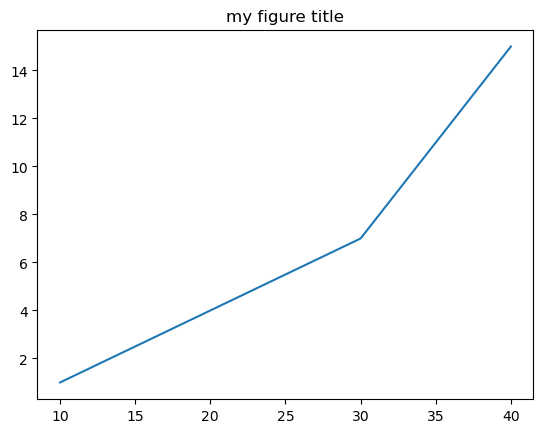

In [5]:
from matplotlib import pyplot as plt

plt.plot(
    [10, 20, 30, 40],
    [1, 4, 7, 15]
)
plt.title("my figure title")
plt.show()

### Objekt-orientierter Ansatz

Hier erzeugen wir explizit ein `Figure` und ein `Axes` Objekt.

Text(0.5, 1.0, 'my figure title')

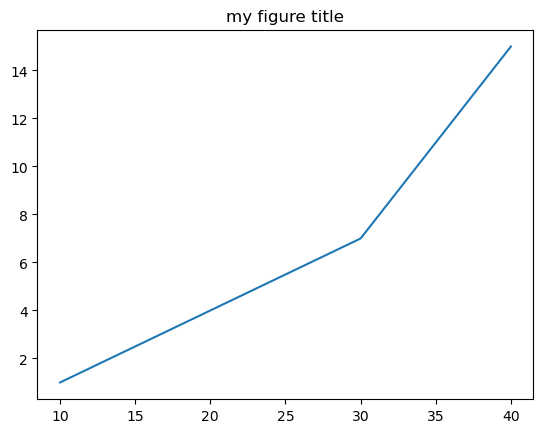

In [6]:
fig, ax = plt.subplots()
ax.plot(
    [10, 20, 30, 40],
    [1, 4, 7, 15]
)
ax.set_title("my figure title")

Wie hier zu sehen ist erzeugen beide Ansätze die genau gleiche Grafik! Sobald wir aber die verschiedenen Elemente der Grafik anpassen möchten, gibt es aber unterschiedliche Wege dies zu tun, je nachdem mit welchem Ansatz wir arbeiten. Hier werden wir v.a. mit dem Objekt-orientierten Ansatz arbeiten.

---
## Plot types

Es gibt **sehr** viele verschiedene Datenvisualisierungs-Typen. Oft bedarf es einiger Erfahrung um den passenden Typen für die passende Fragestellung oder die passenden Daten zu finden. Wir werden uns hier einige der häufigsten Typen anschauen.

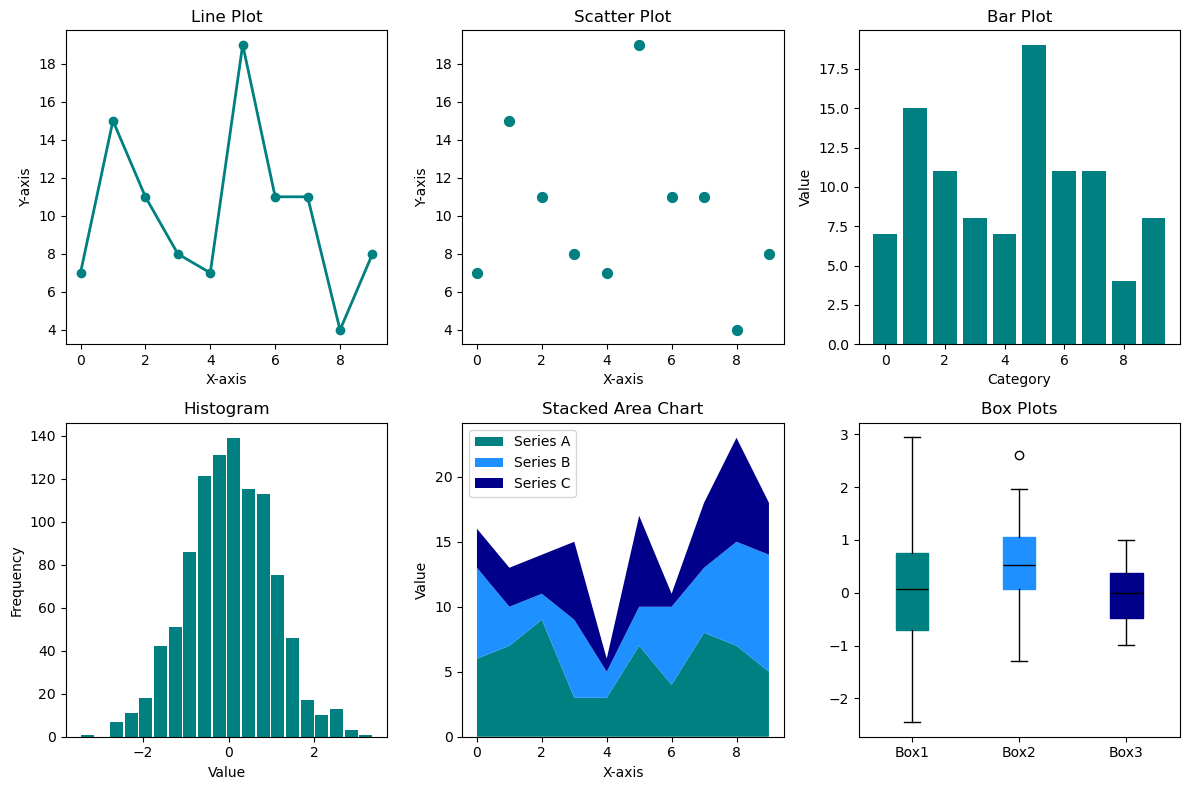

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Set a fixed random seed for reproducibility
np.random.seed(42)

# ------------------------------------------------------------------------
# 1. Data for line, scatter, and bar plots
# ------------------------------------------------------------------------
x = np.arange(10)
y = np.random.randint(1, 20, 10)

# ------------------------------------------------------------------------
# 2. Data for histogram
# ------------------------------------------------------------------------
data_hist = np.random.randn(1000)

# ------------------------------------------------------------------------
# 3. Data for stacked area chart (three rows, 10 columns)
# ------------------------------------------------------------------------
data_area = np.random.randint(1, 10, size=(3, 10))

# ------------------------------------------------------------------------
# 4. Data for three boxplots
# ------------------------------------------------------------------------
data_box1 = np.random.randn(100)
data_box2 = 0.4 + 0.7 * np.random.randn(50)
data_box3 = np.random.uniform(-1, 1, 100)

# ------------------------------------------------------------------------
# Create the 2x3 figure
# ------------------------------------------------------------------------
fig, axs = plt.subplots(2, 3, figsize=(12, 8))

# A single color (teal) for line/scatter/bar/histogram
base_color = 'teal'

# 1. Line Plot
axs[0, 0].plot(
    x, y, 
    color=base_color, 
    marker='o', 
    markerfacecolor=base_color, 
    markeredgecolor=base_color,
    linewidth=2
)
axs[0, 0].set_title("Line Plot", fontsize=12)
axs[0, 0].set_xlabel("X-axis")
axs[0, 0].set_ylabel("Y-axis")

# 2. Scatter Plot
axs[0, 1].scatter(
    x, y, 
    color=base_color, 
    s=50
)
axs[0, 1].set_title("Scatter Plot", fontsize=12)
axs[0, 1].set_xlabel("X-axis")
axs[0, 1].set_ylabel("Y-axis")

# 3. Bar Plot
axs[0, 2].bar(
    x, y, 
    color=base_color, 
    edgecolor='none'
)
axs[0, 2].set_title("Bar Plot", fontsize=12)
axs[0, 2].set_xlabel("Category")
axs[0, 2].set_ylabel("Value")

# 4. Histogram (no borders, spaced like a bar plot)
axs[1, 0].hist(
    data_hist, 
    bins=20, 
    color=base_color, 
    edgecolor='none', 
    rwidth=0.9
)
axs[1, 0].set_title("Histogram", fontsize=12)
axs[1, 0].set_xlabel("Value")
axs[1, 0].set_ylabel("Frequency")

# 5. Stacked Area Chart
colors_area = ['teal', 'dodgerblue', 'darkblue']
axs[1, 1].stackplot(
    x, 
    data_area[0], data_area[1], data_area[2],
    labels=['Series A', 'Series B', 'Series C'],
    colors=colors_area
)
axs[1, 1].legend(loc='upper left')
axs[1, 1].set_title("Stacked Area Chart", fontsize=12)
axs[1, 1].set_xlabel("X-axis")
axs[1, 1].set_ylabel("Value")

# 6. Three Boxplots (using the same three colors)
colors_box = ['teal','dodgerblue','darkblue']
box = axs[1, 2].boxplot(
    [data_box1, data_box2, data_box3], 
    patch_artist=True
)

# Apply colors to each box
for patch, c in zip(box['boxes'], colors_box):
    patch.set_facecolor(c)
    patch.set_edgecolor(c)

# Optionally, color medians (here set to black or another color)
for median in box['medians']:
    median.set(color='black')

# Whiskers, caps, fliers can remain black (default) or be recolored similarly

# Set x-axis labels for the boxplots
axs[1, 2].set_xticks([1, 2, 3])
axs[1, 2].set_xticklabels(["Box1", "Box2", "Box3"])
axs[1, 2].set_title("Box Plots", fontsize=12)

# ------------------------------------------------------------------------
# Adjust layout and show plot
# ------------------------------------------------------------------------
plt.tight_layout()
plt.show()

### Bar plot (Balkendiagram)

Balkendiagramme werden sehr häufig für direkte Vergleiche eingesetzt. Die Balken können danach vertikal ausgerichtet sein (`.bar()`) oder horizontal (`.barh()`).

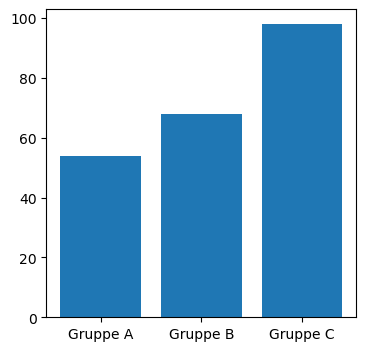

In [9]:
# Fake data...
names = ['Gruppe A', 'Gruppe B', 'Gruppe C']
values = [54, 68, 98]

# Figure und Axes Objekte erzeugen
fig, ax = plt.subplots(figsize=(4, 4))

# Bar plot in Axes Objekt einzeichnen
ax.bar(names, values)
plt.show()

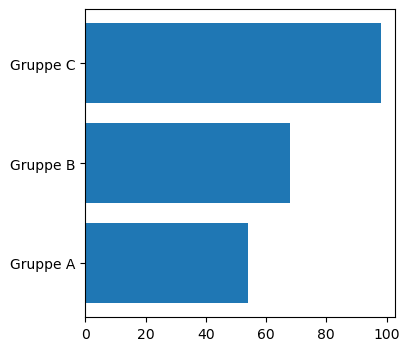

In [10]:
fig, ax = plt.subplots(figsize=(4, 4))
ax.barh(names, values)
plt.show()

### Der Linien Plot (line plot)
Verläufe, zeitliche Entwicklungen etc. werden häufig durch Linienplots dargestellt. Das geht mit 
`ax.plot()` (bzw. `plt.plot()` im funktionalen Ansatz).

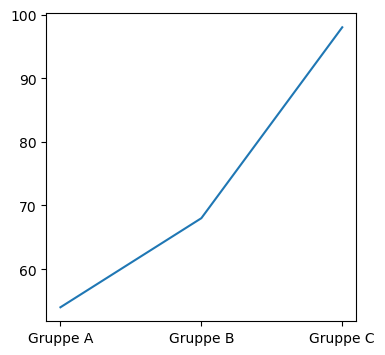

In [11]:
fig, ax = plt.subplots(figsize=(4, 4))
ax.plot(names, values)
plt.show()

Obwohl das hier in diesem Fall *technisch* gesehen geht (der Plot wird dargestellt), ist ein Linienplot für dieses Beispiel, nämlich den Vergleich mehrerer Gruppen, eine denkbar schlechte Lösung!

Linien-Plots machen Sinn für Entwicklungen, also zeitliche Verläufe:

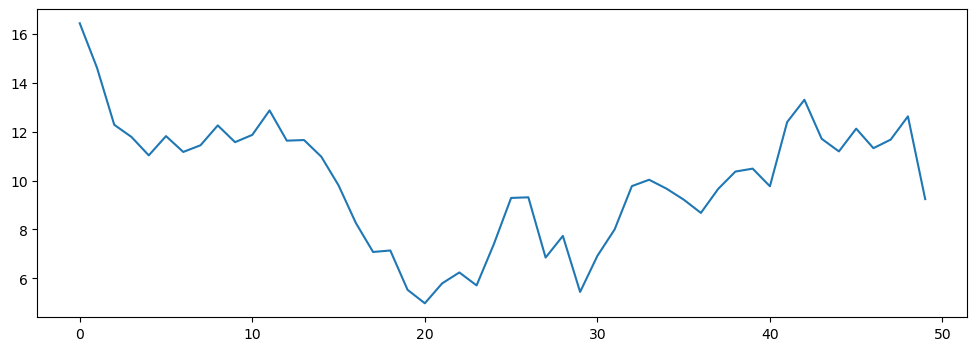

In [12]:
temperature = 18 + np.cumsum(np.random.randn(50))

fig, ax = plt.subplots(figsize=(12, 4))
ax.plot(temperature)
plt.show()

### Scatter plot ("Punktewolken")

Scatter plots werden vorwiegend dazu eingesetzt um zwei oder mehr Größen miteinander zu vergleichen. Das geht mit `ax.scatter()` (bzw. `plt.scatter()`).

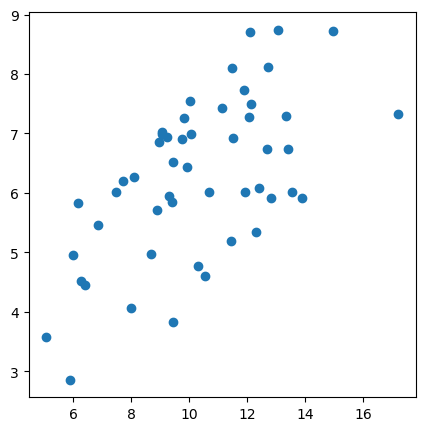

In [14]:
temperature = 18 + np.cumsum(np.random.randn(50))
sunshine = 4 * np.random.rand(50) + 0.4 * temperature

fig, ax = plt.subplots(figsize=(5, 5))
ax.scatter(temperature, sunshine)
plt.show()

### Pie plot (Tortendiagramm)

Auch wenn diese Darstellungsart im Alltag häufig zu sehen ist: in den meisten Fällen gibt es deutlich geeignetere Formen! Nichtsdestotrotz gehört das Tortendiagramm wohl in die Standard-Liste und kann erstellt werden mit: `ax.pie()`

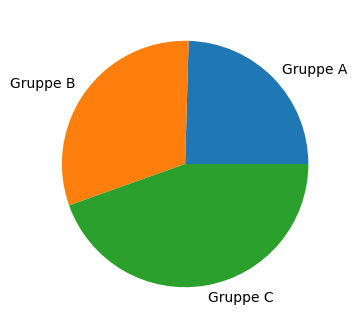

In [15]:
fig, ax = plt.subplots(figsize=(4, 4))
ax.pie(values, labels=names)
plt.show()

## Histogramm (Häufigkeitsverteilung)

Verteilungen von bestimmten Variablen oder Meßgrößen lassen sich oft gut über ein Histogramm darstellen, also über `.hist()`.

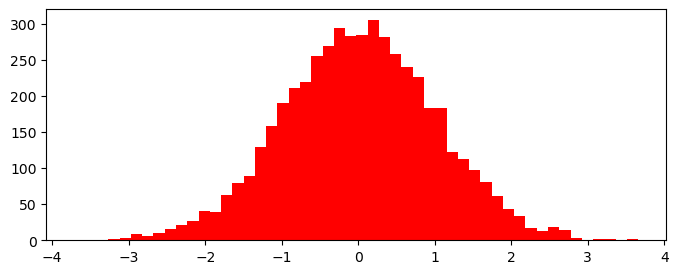

In [16]:
random_numbers = np.random.randn(5000)

fig, ax = plt.subplots(figsize=(8, 3))
ax.hist(random_numbers, 50, color="red", alpha=1)
plt.show()

Dabei gibt der zweite Paramerer (`bins`) die Anzahl der Bins, also Einteilungen, an. Mit `rwidth` können wir die relative Breite der Balken festlegen.

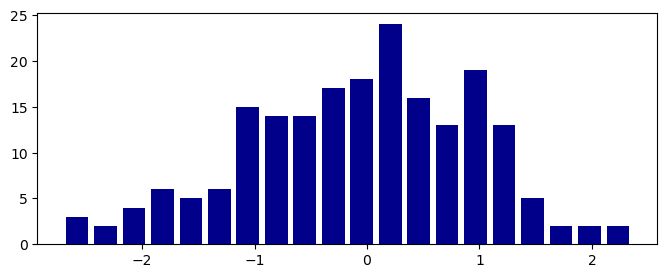

In [17]:
random_numbers = np.random.randn(200)

fig, ax = plt.subplots(figsize=(8, 3))
ax.hist(random_numbers, 20, color="darkblue", rwidth= 0.8, alpha=1)
plt.show()

## Achsen, format

Spätestens hier sehen wir, dass es nicht aussreicht die Daten irgendwie darzustellen.
Wir müssen uns immer auch Gedanken machen, wie das Layout und Format aussieht. Und, *was* genau eigentlich dargestellt wird. Vielleicht ist das für uns selbst erstmal noch klar, da wir den Code selber geschrieben haben. Aber für alle anderen benötigen wir dringend geeignete Achsenbeschriftungen!

Das Format wird hier immer mit `figsize` definiert. Das bezieht sich auch *inches*, auch wenn wir bei der Bildschirmdarstellung natürlich überhaupt nicht an klassische Papiermaße gebunden sind! Zum Parameter `figsize` gehört darum aber auch noch der Parameter `dpi` (für dots-per-inch). Um das besser zu verstehen, ruhig mal mit verschiedenen figsize und dpi Parametern spielen!

### Achsenbeschriftung
Im funktionalen Ansatz können wir Achsen beschriften über

```python
plt.xlabel("x Achse...")
plt.ylabel("y Achse...")
```

Im hier verwendeten Objekt-orientierten Ansatz dagegen nutzen wir

```python
ax.set_xlabel("x Achse...")
ax.set_ylabel("y Achse...")
```

In ähnlicher Weise können wir der Grafik auch einen Titel geben mit `set_title()`.

Den dargestellten Bereich entlang der x- bzw. y-Achse können wir mit `set_xlim()` und `set_ylim()` festlegen.

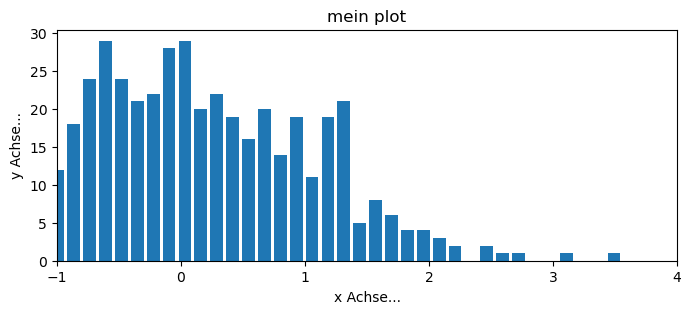

In [19]:
random_numbers = np.random.randn(500)

fig, ax = plt.subplots(figsize=(8, 3))
ax.hist(random_numbers, 50, rwidth=0.8)

# Achsen beschriften
ax.set_xlabel("x Achse...")
ax.set_ylabel("y Achse...")

# Titel
ax.set_title("mein plot")

# Achsenbereich auswählen
ax.set_xlim(-1, 4)
plt.show()

Oder, ein anderes Beispiel mit einem Linien-Plot:

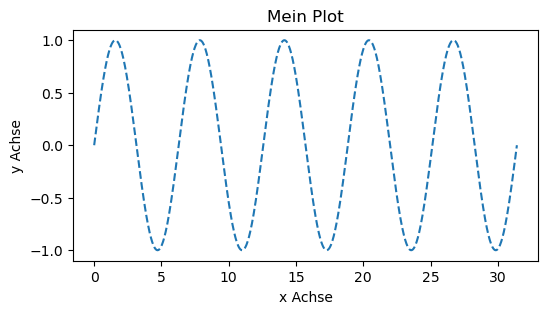

In [22]:
x = np.linspace(0, 10*np.pi, 1000)
y = np.sin(x)

fig, ax = plt.subplots(figsize=(6, 3))
ax.plot(x, y, "--")

ax.set_xlabel("x Achse")
ax.set_ylabel("y Achse")
ax.set_title("Mein Plot")
plt.show()

### Nichtlineare Achsen
In Matplotlib können natürlich auch nicht-lineare Achsen verwendet werden z.B mit `.set_yscale()`, etwas `log` oder `symlog`.

## Wie sieht die Exponentialfunktion aus mit logarithmischer y-Achse?

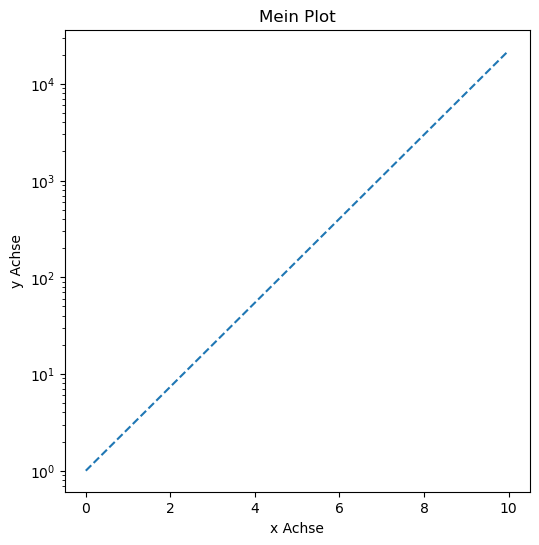

In [20]:
x = np.linspace(0, 10, 1000)
y = np.exp(x)

fig, ax = plt.subplots(figsize=(6, 6))
plt.plot(x, y, "--")

ax.set_xlabel("x Achse")
ax.set_ylabel("y Achse")
ax.set_title("Mein Plot")

# Log-Skala:
ax.set_yscale("log")
plt.show()

### Linestyle

Bei Matplotlib lassen sich im Prinzip alle Elemente einer Grafik anpassen. D.h., wenn wir möchten können wir Schriftgröße, Schriftart, Farbe etc. selbst definieren. Aber aben auch Dinge wie die Liniendicke, Linienfarbe und den Linienstil.

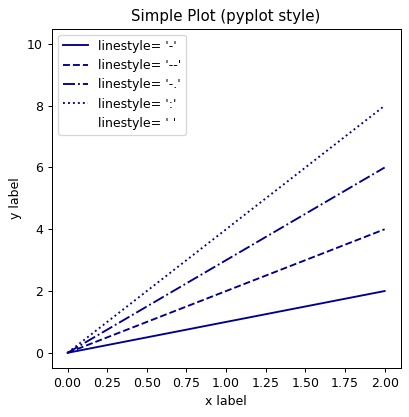

In [36]:
linestyles = ["-", "--", "-.", ":", " "]
x = np.linspace(0, 2, 100)  # Sample data.

fig, ax = plt.subplots(figsize=(5, 5)) #, dpi=90)

for i, linestyle in enumerate(linestyles):
    ax.plot(
        x, (i+1) * x,
        linestyle=linestyle,
        color="darkblue", label=f"linestyle= '{linestyle}'"
    )

plt.xlabel('x label')
plt.ylabel('y label')
plt.title("Simple Plot (pyplot style)")
plt.legend()
plt.show()

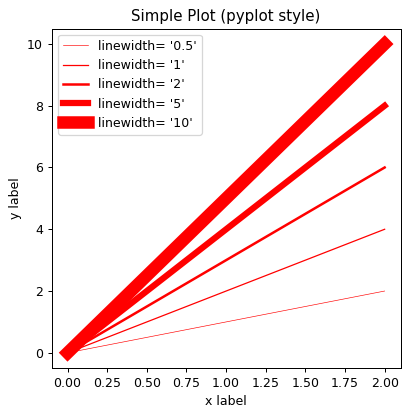

In [38]:
linewidths = [0.5, 1, 2, 5, 10]
x = np.linspace(0, 2, 100)  # Sample data.

plt.figure(figsize=(5,5), dpi=90)

for i, linewidth in enumerate(linewidths):
    plt.plot(x, (i+1) * x,
             linewidth=linewidth,
             color="r", label=f"linewidth= '{linewidth}'")

plt.xlabel('x label')
plt.ylabel('y label')
plt.title("Simple Plot (pyplot style)")
plt.legend()

### Marker
Es gibt eine Menge an verschiedenen Marker-Symbolen zur Auswahl, [siehe matplotlib Marker-Übersicht](https://matplotlib.org/stable/api/markers_api.html?highlight=marker).

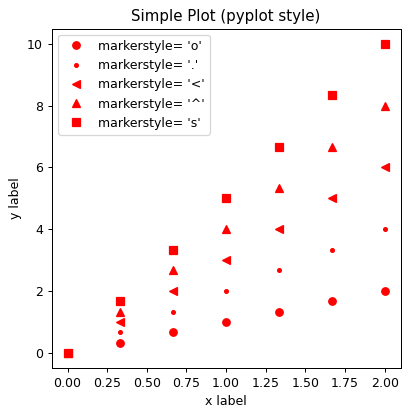

In [40]:
markers = ["o", ".", "<", "^", "s"]
x = np.linspace(0, 2, 7)  # Sample data.

plt.figure(figsize=(5,5), dpi=90)

for i, marker in enumerate(markers):
    plt.plot(x, (i+1) * x, linestyle="",
             marker=marker,
             color="r",
             label=f"markerstyle= '{marker}'")

plt.xlabel('x label')
plt.ylabel('y label')
plt.title("Simple Plot (pyplot style)")
plt.legend()

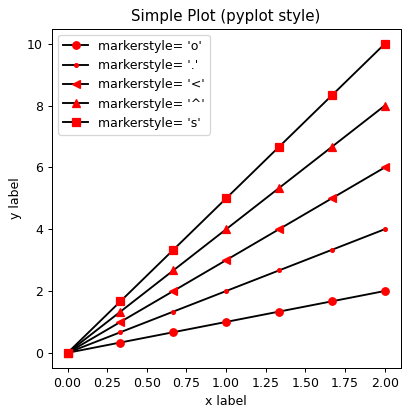

In [42]:
markers = ["o", ".", "<", "^", "s"]
x = np.linspace(0, 2, 7)  # Sample data.

plt.figure(figsize=(5,5), dpi=90)

for i, marker in enumerate(markers):
    plt.plot(x, (i+1) * x, linestyle="-", color="black",
             marker=marker, markerfacecolor="r", markeredgecolor="r",
             label=f"markerstyle= '{marker}'")

plt.xlabel('x label')
plt.ylabel('y label')
plt.title("Simple Plot (pyplot style)")
plt.legend()

## Symbiose mit Pandas (und Seaborn)

In [54]:
import pandas as pd

# More fake data...
df = pd.DataFrame({"age": np.random.randint(16, 92, 200),
                  "length": (170 + 10 * np.random.randn(200)).astype(int)})
df

,age,length
0,84,171
1,42,174
2,32,174
3,50,161
4,50,164
...,...,...
195,66,159
196,21,181
197,52,164
198,63,160


(160.0, 200.0)

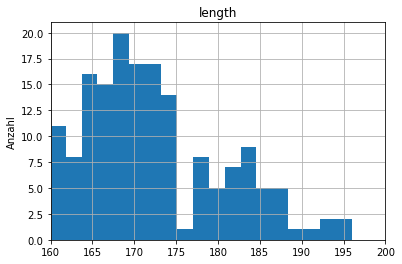

In [59]:
df.hist("length", bins=30)
plt.ylabel("Anzahl")
plt.xlim(160,200)

Text(169.93, 25, 'Mean is 168.9 cm')

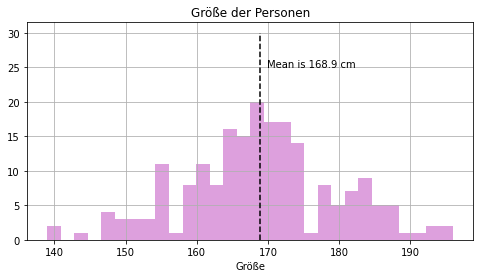

In [60]:
df["length"].hist(bins=30, color="plum", figsize=(8,4))

# Anpassungen in Matplotlib
plt.title("Größe der Personen")
plt.xlabel("Größe")

mean_length = df["length"].mean()
plt.vlines(mean_length, 0, 30,
           linestyle="--", color="black")
plt.text(mean_length + 1, 25,
         f"Mean is {mean_length:.1f} cm")


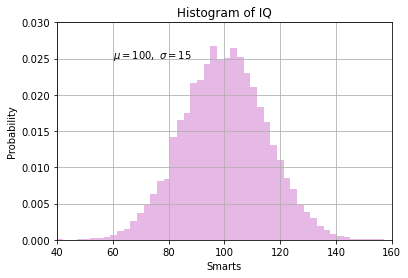

In [9]:
# IQ Beispiel
mu = 100
sigma = 15
# Normal-Verteilung mit Parametern "mu" und "sigma"
x = mu + sigma * np.random.randn(10000)

plt.figure(figsize=(6, 4))

# Histogramm
n, bins, patches = plt.hist(x, 50, density=1, facecolor='plum', alpha=0.75)

# Labels etc.
plt.xlabel('Smarts')
plt.ylabel('Probability')
plt.title('Histogram of IQ')
plt.text(60, .025, r'$\mu=100,\ \sigma=15$')
plt.axis([40, 160, 0, 0.03])
plt.grid(True)
plt.show()

## Farben

Farben können bei Matplotlib auf verschiedene Arten festgelegt werden.
+ **Named colors** sind Farben die Matplotlib "mit Namen kennt", siehe [diese Liste](https://matplotlib.org/stable/gallery/color/named_colors.html)
+ Farben können über Zahlen-Tuple festgelegt werden, entweder `(R, G, B)` oder `(R, G, B, A)` mit Red, Green, Blue, Alpha. Oder als `#RRGGBB` mit Hexademzimal-Werten.


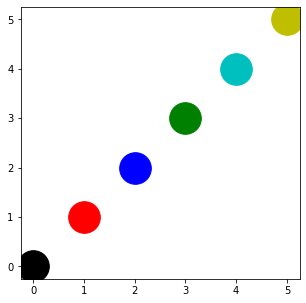

In [61]:
plt.figure(figsize=(5, 5))
for i, color in enumerate(["k", "r", "b", "g", "c", "y"]):
    plt.scatter(i, i, color=color, s=1000)

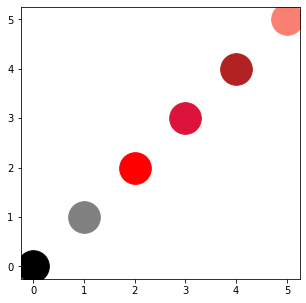

In [62]:
plt.figure(figsize=(5, 5))
for i, color in enumerate(["black", "gray", "red",
                           "crimson", "firebrick", "salmon"]):
    plt.scatter(i, i, color=color, s=1000)

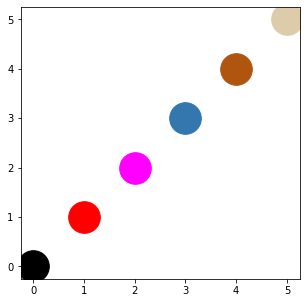

In [65]:
plt.figure(figsize=(5, 5))
for i, color in enumerate(["#000000", "r", "#FF00FF", "#3377AE", "#AF550F", "#DDCCAA"]):
    plt.scatter(i, i, color=color, s=1000)

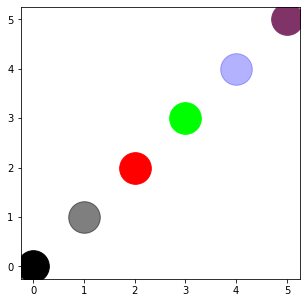

In [64]:
plt.figure(figsize=(5, 5))
for i, color in enumerate([(0, 0, 0), (0, 0, 0, 0.5), (1, 0, 0), (0, 1, 0), (0, 0, 1, 0.3), (0.5, 0.2, 0.4)]):
    plt.scatter(i, i, color=color, s=1000)

## Object-Orientierter Style --> "axes" und "fig"
Bei Matplotlib wird unterschieden zwschen dem [**Figure** Objekt](https://matplotlib.org/stable/api/figure_api.html#matplotlib.figure.Figure) (fig) und dem [**Axes** Objekt](https://matplotlib.org/stable/api/axes_api.html#matplotlib.axes.Axes) (axes).
Axes sind die eigentlichen "Plots". Jedes Axes enthält mehrere Achsen (**Axis**), zwei in 2D und drei in 3D.
Eine Figure kann mehrere Axes (also Plots) enthalten.


### Zwei Arten Matplotlib zu benutzen
#### 1) "Pyplot style"

Text(0.5, 1.0, 'my figure title')

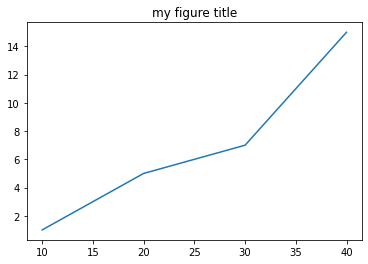

In [66]:
from matplotlib import pyplot as plt

plt.plot([10, 20, 30, 40], [1, 5, 7, 15])
plt.title("my figure title")

oder:  
#### 2) Object orientiert über Figure, Axes

Text(0.5, 1.0, 'my figure title')

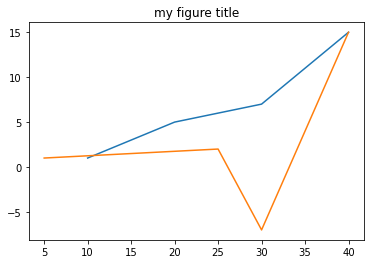

In [68]:
from matplotlib import pyplot as plt

fig, ax = plt.subplots()
ax.plot([10, 20, 30, 40], [1, 5, 7, 15])
ax.plot([5, 25, 30, 40], [1, 2, -7, 15])
ax.set_title("my figure title")

## Subplots - mehrere Plots kombinieren

Auch hier gibt es wieder die 2 oben beschriebenen Möglichkeiten, (1) Ojektorientiert oder (2) mit pyplot

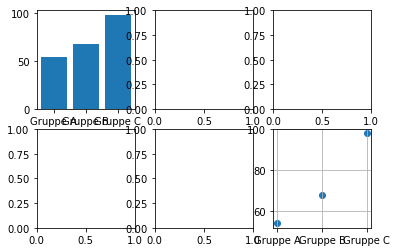

In [76]:
fig, axs = plt.subplots(2, 3)
axs[0, 0].bar(names, values)
axs[1, 2].scatter(names, values)
axs[1, 2].grid(True)
plt.show()

Auch mit dem "*pyplot-style*" können die einzelnen Subplots individuell angepasst werden.  
Dazu kann man direkt bei matplotlib das [pyplot tutorial](https://matplotlib.org/stable/tutorials/introductory/pyplot.html#sphx-glr-tutorials-introductory-pyplot-py) nachlesen/nacharbeiten.
Für komplexe Plots (mit vielen Subplots) ist aber in der Regel das Objekt-Orientierte Interface übersichtlicher.

Etwas verwirrend ist, dass sich in den beiden Fällen die Methodennamen unterscheiden, typischerweise so:

`plt.xlabel("whatever")` vs `ax.set_xlabel("whatever")`  
`plt.title("whatever")` vs `ax.set_title("whatever")`

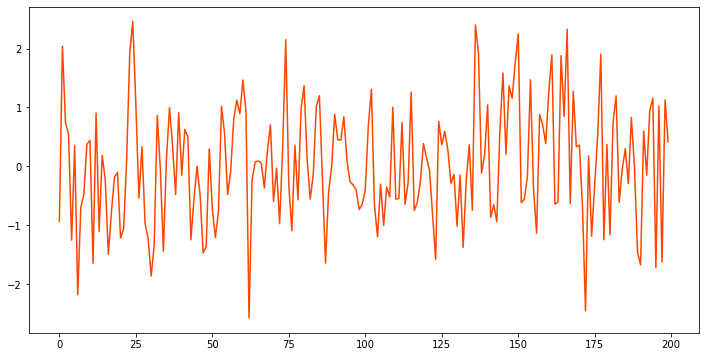

In [12]:
random_numbers = np.random.randn(200)

fig, ax = plt.subplots(figsize=(12, 6))

ax.plot(random_numbers, color="orangered")

# Einzelne Axes Objekte anpassen:

plt.show()

## Shared axes

+ Mit dem objekt-orientierten Ansatz können auch zwei verschiedene Größen in einem Plot mit geteilter x-Achse eingezeichnet werden.

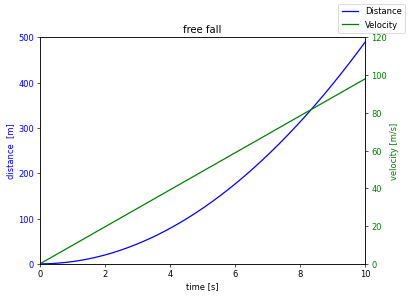

In [78]:
# Freier Fall
time = np.arange(0, 10, 0.01)
g = 9.81  # m/s^2
velocity = g * time
distance = 0.5 * g * time ** 2

# Plot
fig, ax1 = plt.subplots(figsize=(7, 5), dpi=60)

# ax1
ax1.plot(time, distance, "blue")
ax1.tick_params(axis="y", labelcolor="blue")
ax1.set_ylabel("distance  [m]", color="blue")
ax1.set_xlabel("time [s]")
ax1.set_ylim(0, 500)

# ax2
ax2 = ax1.twinx() # Erzeug ein weiteres Axes-Objekt das sich mit ax1 die x-Achse teilt
ax2.plot(time, velocity, "green")
ax2.set_ylabel("velocity [m/s]", color="green")
ax2.tick_params(axis="y", labelcolor="green")
ax2.set_ylim(0, 120)
ax1.set_xlim(0, 10)

fig.legend(["Distance", "Velocity"])
plt.title("free fall")
plt.show()

## Plots über Schleifen erstellen
Mit dem Objekt-Orientierten Interface können auch viele Plots über eine oder mehrere `for`-Schleifen erstellt werden.

Dazu lassen wir den Loop über die verschiedenen `Axes` laufen wie in dem folgenden Beispiel:

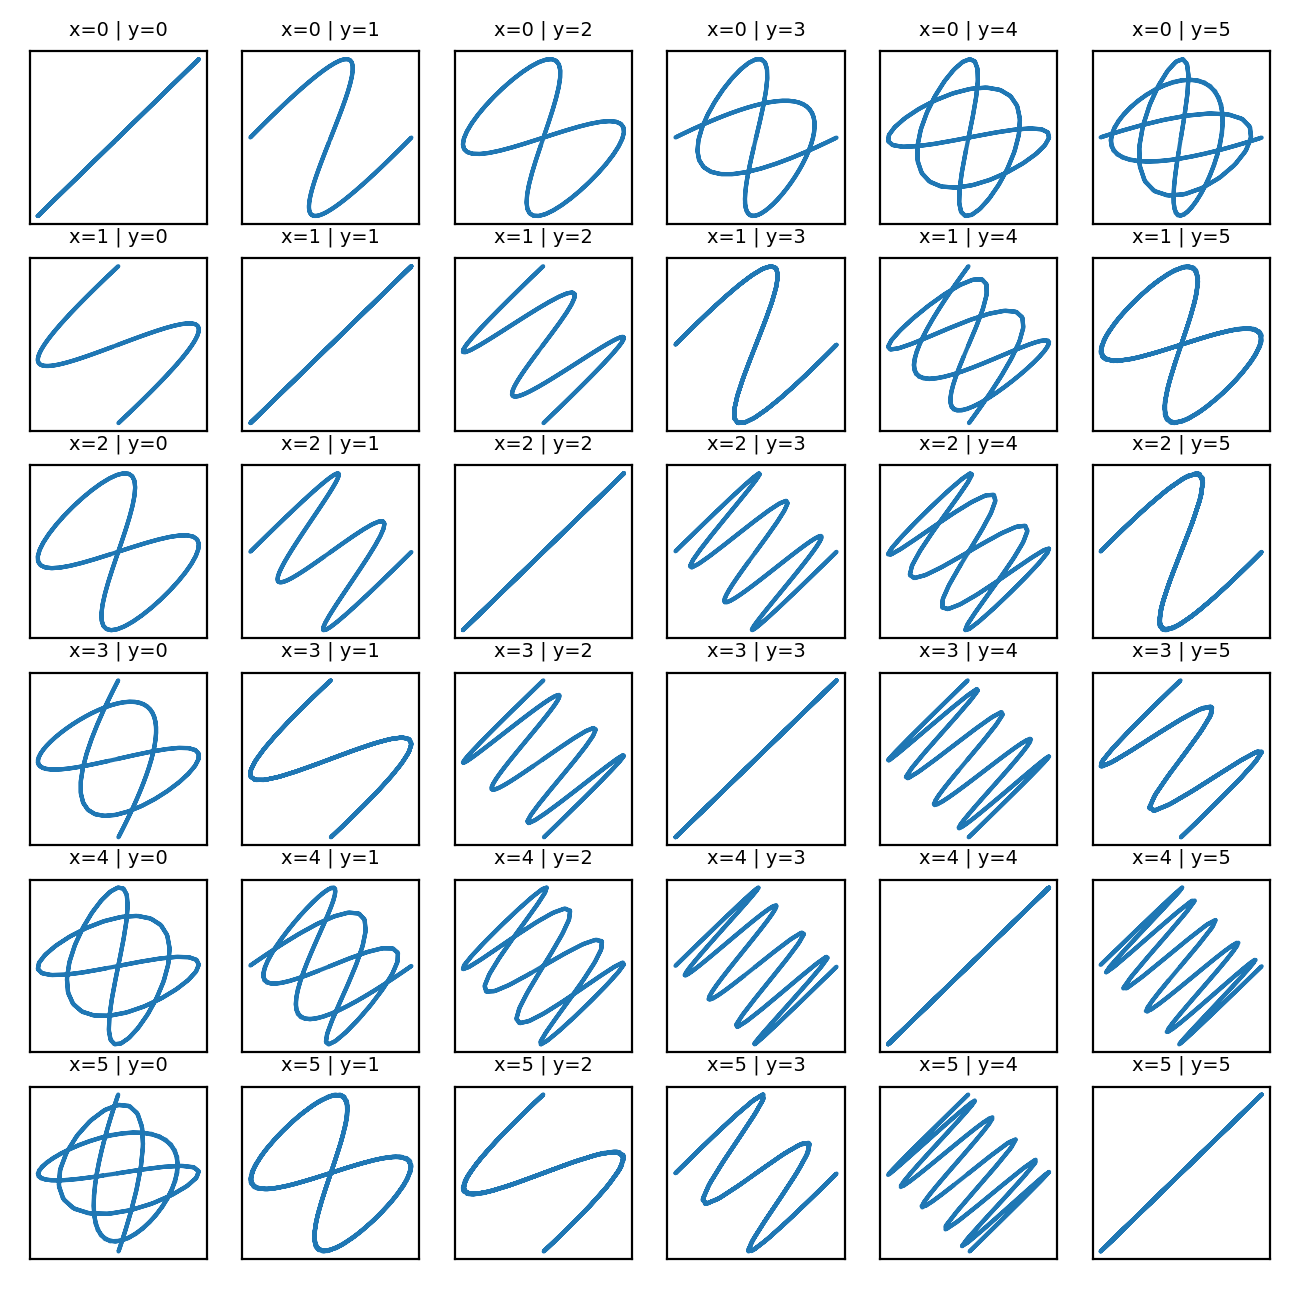

In [80]:
def squiggle_xy(a, b, i=np.arange(0.0, 2*np.pi, 0.05)):
    return np.sin(i*a)*np.cos(i*b), np.cos(i*a)*np.sin(i*b)

dim_x = 6
dim_y = 6
fig, axs = plt.subplots(dim_x, dim_y, figsize=(8, 8), dpi=200)

for x in range(dim_x):
    for y in range(dim_y):
        axs[x, y].plot(*squiggle_xy(x + 1, y + 1))
        axs[x, y].set(xticks=[], yticks=[])
        axs[x, y].set_title(f"x={x} | y={y}", fontsize=7)

plt.show()

### Plot 2D/3D Data 
* Werte auf 2D Gitter (z.B. Höhen, Bilder...): `plt.imshow()`

### `plt.imshow()`

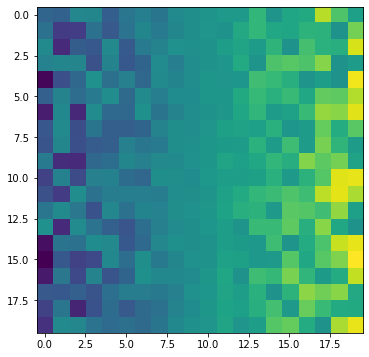

In [87]:
arr = np.random.random((20, 20)) * np.linspace(-1, 1, 20)

plt.figure(figsize=(6,6))
plt.imshow(arr)

### `plt.contour()`

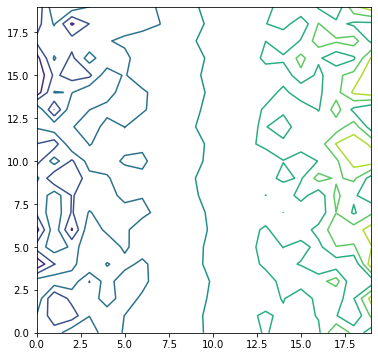

In [88]:
plt.figure(figsize=(6,6))
plt.contour(arr)

## More fake data: "landscape"

In [89]:
n = 500
x, y = np.meshgrid(np.linspace(-3, 3, n),
                   np.linspace(-3, 3, n))

z = (1 - x/2 + x**5 + y**3) * np.exp(-x**2 - y**2)
print(f"'z' hat die Form: {z.shape}")

'z' hat die Form: (500, 500)


In [90]:
z

array([[-4.07401958e-06, -4.29919749e-06, -4.53533585e-06, ...,
         3.62098001e-06,  3.44811482e-06,  3.28206063e-06],
       [-4.37287339e-06, -4.61446687e-06, -4.86781133e-06, ...,
         3.89741457e-06,  3.71122130e-06,  3.53237524e-06],
       [-4.69233163e-06, -4.95146515e-06, -5.22319372e-06, ...,
         4.19367707e-06,  3.99319078e-06,  3.80062746e-06],
       ...,
       [-3.76545993e-06, -3.95539782e-06, -4.15307442e-06, ...,
         5.26379637e-06,  4.98925812e-06,  4.72749916e-06],
       [-3.49964129e-06, -3.67604360e-06, -3.85962160e-06, ...,
         4.90560429e-06,  4.64964457e-06,  4.40560734e-06],
       [-3.25160068e-06, -3.41538087e-06, -3.58581248e-06, ...,
         4.57050338e-06,  4.33193144e-06,  4.10447954e-06]])

### `plt.imshow()`

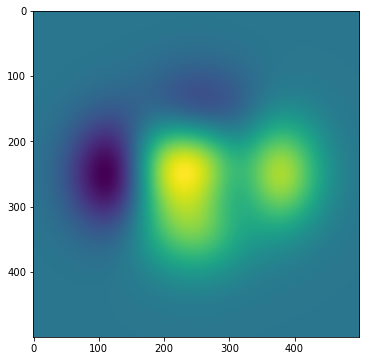

In [92]:
plt.figure(figsize=(6,6))
plt.imshow(z)

### `plt.contour()`

<a list of 9 text.Text objects>

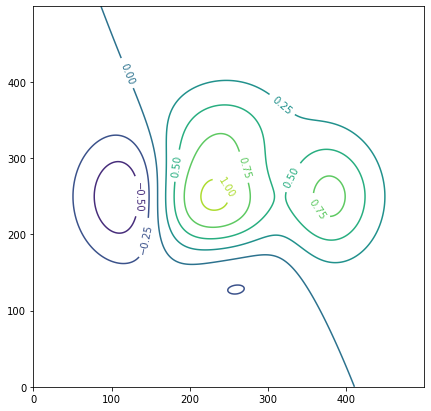

In [93]:
plt.figure(figsize=(7, 7))
fig = plt.contour(z)
plt.clabel(fig, inline=True, fontsize=10)

## 3D geht auch (ein wenig...)

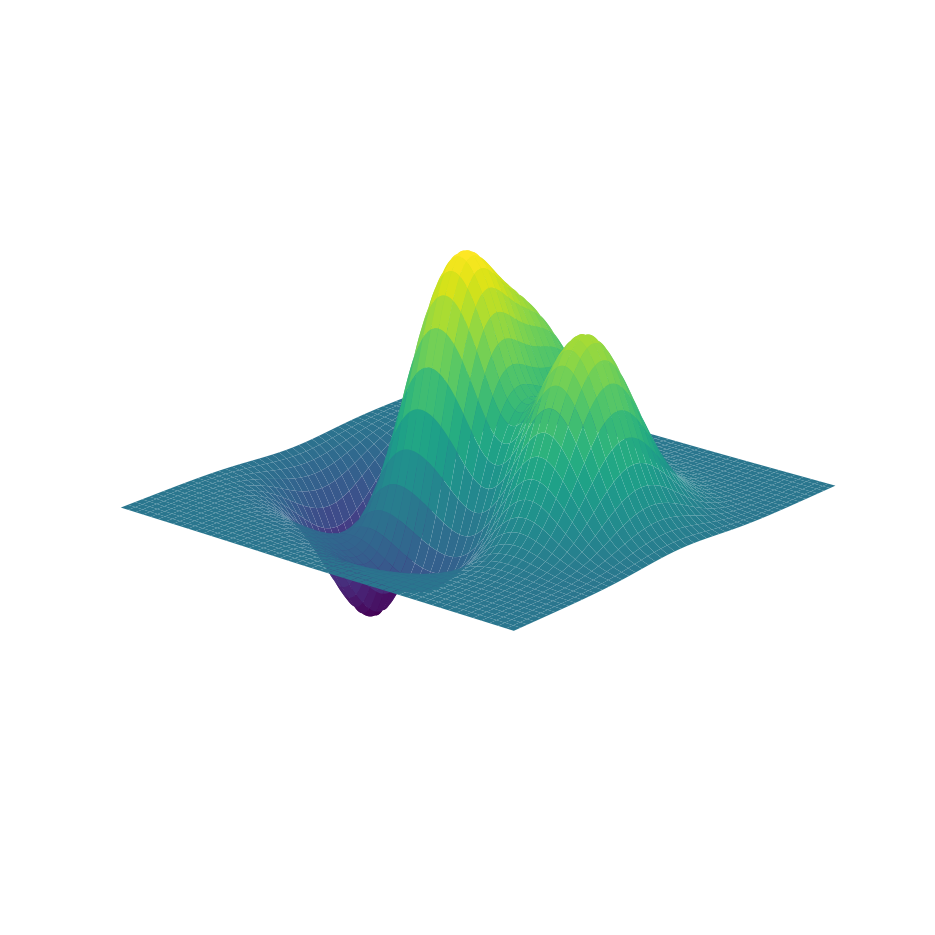

In [95]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"},
                      figsize=(8, 8), dpi=150)

surf = ax.plot_surface(x, y, z, cmap="viridis",
                       linewidth=0, antialiased=True)

ax.view_init(20, -50) # Blickwinkel festlegen
ax._axis3don = False # 3d Achsen nicht anzeigen
plt.show()

## Ausblick
...